<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<p>
<h1>Algorítmica Avanzada</h1>
<h2>Práctica 1 - Grafos </h2>
</center>
</p>
</div>

<div class="alert alert-danger" style="width:95%; margin:0 auto; padding">
<center><p><h2> ¡¡IMPORTANTE!! </h2></p> </center> 

<p>
Para la realización de esta práctica tendréis que utilizar la clase de grafos NetworkX y <b>NO</b> la clase `Graph` que implementasteis en la Práctica 0. Hay casos muy concretos que no contemplaban los tests y podría hacer que vuestros algoritmos no funcionen correctamente. NetworkX tiene una interfaz muy similar a la librería <i>Graph</i> que implementasteis la semana pasada. Para más información podéis consultar la documentación de la librería <a href="https://networkx.github.io/documentation/latest/reference/introduction.html">aquí.</a>
</p>
</div>

<div class="alert alert-info">
<center>
  <h1>Introducción</h1>
</center>

A lo largo de esta práctica trabajaremos con el grafo generado a partir de la red de metro de Londres. En este grafo, los nodos representan las estaciones y las aristas las vias que van de una estación a otra. Todas las aristas tienen cuatro atributos:

* Linea
* Color
* Nombre (de la linea)
* Distancia

Los nodos contienen: 
* El nombre de la estación
* La latitud y longitud de la estación
* Número de lineas
* Zona


In [1]:
from util import get_subway_graph, draw_subway_graph
from networkx import nx

# Carga del grafo del metro con el que trabajaremos
G, lines = get_subway_graph('csv')

# Algunos nodos
print(list(G.nodes())[:20],'...')
# Algunas aristas
print(list(G.edges())[:20],'...')
print('\n')
print("Ejemplo de arista: ",G.edges[156,167])
print("Ejemplo de nodo: ",G.node[33])

[11, 163, 212, 49, 87, 197, 82, 193, 84, 148, 279, 113, 246, 298, 114, 140, 137, 206, 237, 143] ...
[(11, 163), (11, 212), (11, 83), (11, 104), (11, 28), (11, 249), (11, 94), (163, 82), (212, 192), (49, 87), (49, 197), (49, 151), (87, 279), (87, 255), (87, 285), (197, 192), (197, 107), (197, 151), (82, 193), (193, 278)] ...


Ejemplo de arista:  {'name': 'Metropolitan Line', 'color': '8b004c', 'stripe': 'NULL', 'line': 8, 'distance': 0.006350590523722737}
Ejemplo de nodo:  {'latitude': 51.5269, 'longitude': -0.0247, 'name': 'Bow Road', 'display_name': 'Bow<br />Road', 'zone': 2.0, 'total_lines': 2, 'rail': '0'}


Para más consultas, la información ha sido extraida de Wikimedia Commons:

https://commons.wikimedia.org/wiki/London_Underground_geographic_maps/CSV

# util.py

En este archivo se os facilitan varias funciones que os permitiran cargar y visualizar la red de metro.
```python
"""
Retorna un objeto nx.Graph que corresponde al grafo de la red de metro y un 
diccionario con las lineas del metro
 - location: ruta donde esta almacenado el archivo .csv
"""
G, lines = get_subway_graph(location)

"""
Dibuja el grafo que le pasemos por parametro.
- G: Grafo de la red de metro
- lines: diccionario con la información sobre las lineas del metro
- figsize: parametro opcional que nos permite definir el tamaño de la figura
- show_labels: parametro opcional que nos permite indicar si queremos mostrar los 
    nombres de las estaciones
"""
draw_subway_graph(G, lines, figsize=(10,6), show_labels=False)

```

C:\Users\oriol\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


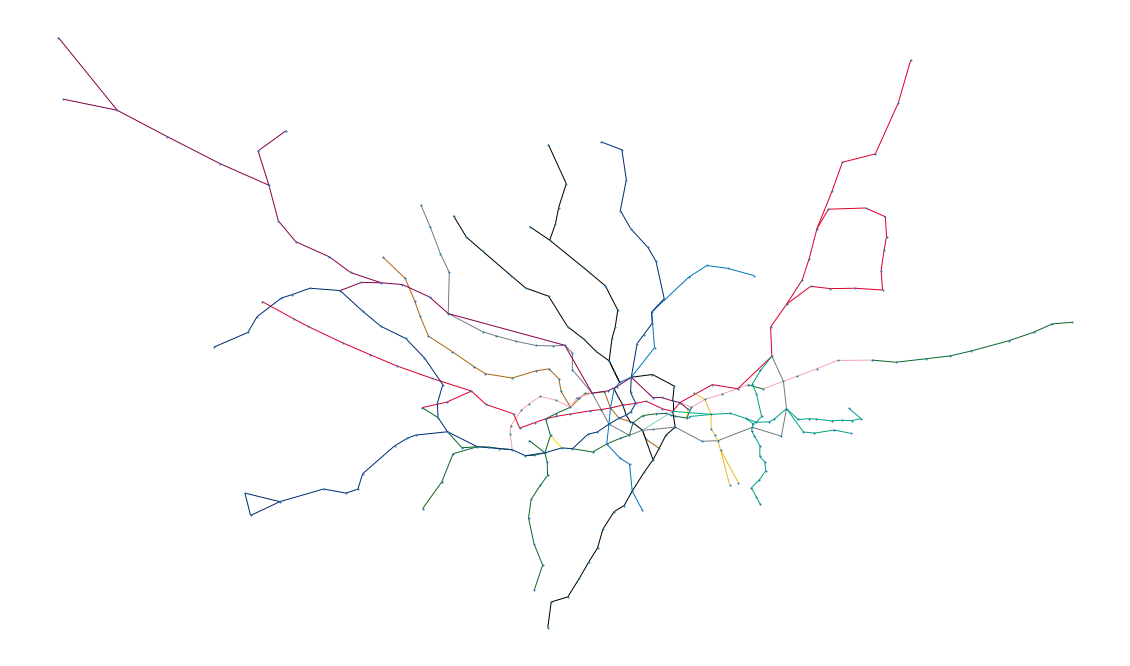

In [7]:
draw_subway_graph(G, lines, figsize=(20,12))

<div class="alert alert-info">
<center>
  <h1>Contenido</h1>
  </center><p>



<div class="alert alert-success" style="width:90%; margin:0 auto;">

  <h2><p>1- Dijkstra</p></h2>
  <p>
 En esta segunda parte de la práctica se propone que implementéis el algoritmo <a href="https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm">Dijkstra</a> (explicado en teoría) para encontrar el camino más corto entre dos paradas de la red de metro de Londres.
</p>



<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center>
<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Este es el grafo (en el caso de esta practica la red de metro) que utilizaremos para buscar el camino. Debe de ser un objeto de tipo `nx.Graph`.</li>
<li>__origen__: Este parámetro corresponde al índice de un nodo. En este caso, como indexamos los nodos con el identificador de las paradas de Metro, deberá ser un entero _(e.g. 231)_.</li>
<li>__destino__: El indice del nodo al que queremos llegar. Igual que el origen, deberá ser un entero.</li>
<li>__infinity=*(int)*__: Parametro opcional en el que definimos que numero nos va bien para utilizar como infinito en el momento de inicializar los pesos de los nodos.</li>
</ul>
<br>
<h3>OUTPUT</h3>
El output de una funcion es un <b>diccionario</b> que contiene los siguientes valores
<ul>
<li>__ _'path'_ __: Una lista de índices correspondientes al camino encontrado del nodo inicial al nodo final (ambos nodos, inicio y final, han de estar incluidos en esta lista).</li>
<li>__ _'expanded'_ __: El numero de nodos que se han visitado para encontrar la solución.</li>
<li>__ _'distance'_ __: La distancia del camino mínimo desde el origen hasta el destino (es decir, el valor del nodo destino).
<ul>

</p>
</div>


In [170]:
import heapq

def dijkstra(G, origen, destino, infinity=2**32-1):
    
    Distancia = {}
    Padres = {}
    heap = [] #Inicializar el heap
    expanded = 0 #Sabremos el numero de nodos visitados para llegar a destino
    
    heapq.heapify(heap) #Lo hacemos heap
    
    for i in G.nodes(): #la i nos indicara el nodo y seria la key para el dic
        Padres[i]=None
        Distancia[i] = infinity 
    
    Distancia[origen] = 0 #en el origen la distancia es 0 para empezar por sus vecinos
    heapq.heappush(heap,(0,origen))
    
    while heap: #Hasta que el heap no este vacio
        node = heapq.heappop(heap)#Cogemos el nodo más pequeño del heap
        expanded+=1
        nodo = node[1] #separamos en el nodo y su distancia
        distancia = node[0]
        if nodo == destino: #Al ser un heap serà el más pequeño por eso nos reduce el coste computacional este break
            break
        for neighbor in G.neighbors(nodo): #por cada vecino comprobaremos la distancia
            a = distancia + G.edges[neighbor,nodo] ['distance']
            if Distancia[neighbor] > a: #los que esten a infinito siempre seran cambiados
                Distancia[neighbor] = a #Actualizamos la distancia
                Padres[neighbor] = nodo #Actualizamos los padres
                heapq.heappush(heap,(a,neighbor)) #realizamos el push ya que no sera inifnito la distancia
    
    nodo = destino
    path = []
    
    while nodo!=origen:  #Hacemos backtracking para coger el path
        path.append(Padres[nodo])
        nodo = Padres[nodo]
    
    path.reverse()
    
    return {
        'path': path+[destino], #añadimos el destino al final del path que ha fatado en el backtracking
        'expanded': expanded,
        'distance': Distancia[destino] #La distancia total sera la que tiene el nodo destino en su dic
    }

In [171]:
# Prueba tu algoritmo! 
# El camino esperado es: [10, 128, 39, 145, 89, 277, 192, 107, 133, 146, 236, 99, 74, 17, 110, 265, 1, 73, 182, 194, 5, 252, 251, 235]
print(dijkstra(G, 10, 235))

{'path': [10, 128, 39, 145, 89, 277, 192, 107, 133, 146, 236, 99, 74, 17, 110, 265, 1, 73, 182, 194, 5, 252, 251, 235], 'expanded': 279, 'distance': 0.31895111263175857}


<div class="alert alert-success" style="width:90%; margin:0 auto;">

  <h2><p>2- Paradas intermedias</p></h2>
   <p>
 Se propone aquí implementar una variante del algoritmo Dijkstra que encuentre el camino más corto entre dos paradas de metro forzando el mismo a pasar por una serie de paradas intermedias. Por ejemplo, queremos encontrar el camino más corto entre el nodo 10 y 235 pero pasando por el 33 y el 122. El algoritmo debe encontrar el orden idóneo de visita de los nodos intermedios (33 --> 122 o 122 --> 33) sabiendo que empezamos en 10 y acabamos en 235.
</p>

<p></p>

<p>
<b> Nota: </b> Recordad que en Algorítmica Avanzada buscamos la implementación de algoritmos que no solo resuelvan el problema, sino que lo hagan de manera eficiente.
</p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center>
<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Este es el grafo (en el caso de esta practica la red de metro) que utilizaremos para buscar el camino. Debe de ser un objeto de tipo `nx.Graph`.</li>
<li>__origen__: Este parámetro corresponde al índice de un nodo. En este caso, como indexamos los nodos con el identificador de las paradas de Metro, deberá ser un entero _(e.g. 231)_.</li>
<li>__destino__: El indice del nodo al que queremos llegar. Igual que el origen, deberá ser un entero.</li>
<li>__paradas__: Una lista de índices de nodos por los que queremos pasar de camino entre el origen y el destino. </li>
<li>__infinity=*(int)*__: Parametro opcional en el que definimos que numero nos va bien para utilizar como infinito en el momento de inicializar los pesos de los nodos.</li>
</ul>
<br>
<h3>OUTPUT</h3>
El output de una funcion es un <b>diccionario</b> que contiene los siguientes valores
<ul>
<li>__'ordering'__: Una lista de índices en el orden óptimo de visita. El primer y último elemento de la lista deben corresponderse, respectivamente, con el nodo origen y destino. El resto de elementos de la lista serán todas las paradas solicitadas.</li>
<li>__'expanded'__: El numero de nodos que se han visitado para encontrar la solución.</li>
    <li>__'distance'__: La distancia que se recorrerá desde el origen hasta el destino.</li>
</ul>

</p>


<p>
<b>Nota: </b> No se pide el camino completo entre origen y destino, solo el orden óptimo de visita de los nodos. No obstante, se valorará positivamente la reconstrucción del camino completo. Si lo incluís, añadidlo al diccionario que se devuelve con la clave 'complete_path'.
    </p>
</div>


In [172]:
from itertools import permutations

#Mi version 

def stops_ordering(G, origen, destino, paradas, infinity=2**32-1):
    
    combinaciones = list(permutations(paradas)) #Para que no sea tupla hara falta convertirlo a lista
    
    distancias = []
    
    expanded = []
    
    for i in range(len(combinaciones)): #usaremos la posicion para indicar las distancias y expandeds de cada combinacion
        distancias.append(0)
        expanded.append(0)
    
    contador = 0 #Asi tendremos el indice que nos indicara el lugar de la distancia
    for combi in combinaciones:
        
        distancias[contador]+=dijkstra(G,origen,combi[0])['distance'] #Hacemos incrementos en las posiciones para distancia
        expanded[contador]+=dijkstra(G,origen,combi[0])['expanded']#Incrementos en los nodos visitados para llegar de origen a 
                                                                    #La primera parada 
        distancias[contador]+=dijkstra(G,destino,combi[-1])['distance']
        expanded[contador]+=dijkstra(G,destino,combi[-1])['expanded']
        for i in range (len(combi)-1):#menos 1 ya que trabajamos con los indices
            distancias[contador]+=dijkstra(G,combi[i],combi[i+1])['distance']#Hasta que llegue a la penultima hacemos los incrementos
            expanded[contador]+=dijkstra(G,combi[i],combi[i+1])['expanded']#igual que arriba con los expanded
        contador+=1
    
    minimo = infinity
    indice = -1
    expand = 0
    for i in range (len(distancias)): #Compararemos los minimos para saber en que indice en el que estan las permutaciones
        if minimo>distancias[i]:
            minimo = distancias[i]
            indice =i
        expand += expanded[i]
    return {
        'ordering': [origen]+list(combinaciones[indice])+[destino], #lo haremos lista ya que es una tupla combinaciones[indice]
        'expanded': expand,
        'distance': minimo
    }

In [ ]:
#Version Angel Morales

#dijkstra que retorna el diccionari de distancies
def dijkstra_to_N_nodes(G, origen, infinity=2**32-1):
    minHeap = []
    previous = {x:None for x in G.nodes}
    distance = {x:infinity for x in G.nodes}
    distance[origen] = 0
    expanded = 0
    heapq.heappush(minHeap,(distance[origen],origen))

    while minHeap:
            u = heapq.heappop(minHeap)[1]
            for v in G.neighbors(u):
                expanded += 1
                aux = distance[u] + G.edges[u,v]['distance']
                if aux < distance[v]:
                    distance[v] = aux
                    previous[v] = u
                    heapq.heappush(minHeap,(distance[v],v))
    
    
    return {
        'expanded': expanded,
        'dictDistance' : distance
          
    }


import itertools
def stops_ordering(G, origen, destino, paradas, infinity=2**32-1):
    #Creem un graf per guardar distàncies entre les parades
    stopsGraph = nx.Graph()
    expanded = 0
    if not paradas:
        dijkstra_value = dijkstra(G,origen,destino,infinity)
        return {
            'ordering': [origen,destino],
            'expanded': dijkstra_value['expanded'],
            'distance': dijkstra_value['distance'],
            'complete_path':dijkstra_value['path']
            
        }
    
    subnodes = [origen]+paradas+[destino]
    #Per cada node de les parades fem dijkstra i guardem la distància amb tots els altres nodes al graf de parades
    for node in subnodes:# Fem K * (dijkstra + K)
        dijkstra_value = dijkstra_to_N_nodes(G,node,infinity)
        expanded += dijkstra_value['expanded']
        edgeList = [(node,adjacent,{'distance':dijkstra_value['dictDistance'][adjacent]}) for adjacent in subnodes] 
        stopsGraph.add_edges_from(edgeList)

    #Generem totes les permutacions : K!
    possiblePaths = list(itertools.permutations(paradas,len(paradas)))
    minDistance = infinity
    minPath = tuple()
    #Per cada permutació mirem si la distància total és més petita
    for path in possiblePaths:

        totalDistance = stopsGraph[origen][path[0]]['distance'] + stopsGraph[path[-1]][destino]['distance']
        for x in range(1,len(path),1):# K
            totalDistance += stopsGraph[path[x-1]][path[x]]['distance']
        if totalDistance < minDistance:
            minDistance = totalDistance
            minPath = path
            
    ordering = [origen] + [x for x in minPath] + [destino]
    completePath = list()
    #Fem dijkstra punt a punt per trobar complete_path
    for i in range(1,len(ordering)):#K*dijkstra
        dijkstra_value = dijkstra(G,ordering[i-1],ordering[i],infinity)
        expanded += dijkstra_value['expanded']
        completePath += dijkstra_value['path'][:-1]
        
    completePath += [destino]    
    return {
        'ordering': ordering,
        'expanded': expanded,
        'distance': minDistance,
        'complete_path' :completePath
    }

In [173]:
# Prueba tu algoritmo! El orden de recorrido esperado es: [10, 33, 122, 235]
# 10 al 33 con [122,35,87,92] orden : [10,87,122,35,92,33]
print(stops_ordering(G, 10, 235, [33,122]))

{'ordering': [10, 33, 122, 235], 'expanded': 874, 'distance': 0.5169849201008003}


<div class="alert alert-warning" style="width:80%; margin:0 auto; padding">
<center><p><h3> Comentarios Dijkstra</h3></p> </center> </div>

### _(En esta sección se os propone explicar como habeis realizado la implementación y cual es la complejidad detallada del algoritmo. Podéis contestar en este mismo bloque)_

Para realizar la implementación del Dijkstra me he basado en el pseudocodigo que se nos da en teoria sobre dijkstra, la principal diferencia esta en que insiero al heap una vez se varia la distancia y no es infinito.
En cuanto el algoritmo en si se hacen dos diccionarios que son padres y distancias para guardar el valor de cada nodo cual serà su padre y la distancia acumulada desde origen; se realiza una estructura de datos que es el heap debido a que es la mas optima como se explico en teoria. Hasta que se vacie e heap (peor caso) el algoritmo hara pop del heap y visitara los vecinos actualizando sus distancias, el propio pop ya tendra su distancia minimo y lo sabemos debido a que es un heap. Una vez la distancia que tiene el nodo es mas grande a la del nodo acumulado mas la arista esta se actualiza en los diccionarios junto al padre y se subirà al heap. Una vez encuentra el destino es encontrado hace un break para reducir el coste y se hace un backtracking para saber el path através de los padres.

La complejidad de Dijkstra en una primera instancia podria parecer O(n^2) siendo n los vertices ya que hay un doble bucle, pero seria esa complejidad en el caso de que la estructura de datos empleada fuese una cola sin prioridad, pero yo al usar una cola de prioridad la complejidad se vuelve O(A log(n)) siendo A el numero de Aristas por el logartimo de los vertices, ya que dependera de las aristas (num de vecinos) para ver los nodos(vertices).

<div class="alert alert-warning" style="width:80%; margin:0 auto; padding">
<center><p><h3> Comentarios Orden óptimo de Paradas Intermedias</h3></p> </center> </div>

### _(En esta sección se os propone explicar como habeis realizado la implementación y cual es la complejidad detallada del algoritmo. Podéis contestar en este mismo bloque)_

En la implementación de Paradas intermedias la solución que se ha encontrado és realizar todas las permutaciones posibles de paradas, ya que el problema de este algoritmo no se sabe cual es el mas optimo a no ser que se compare entre las distancias de todos, esto nos deja con que se debe hacer todas las permutaciones posibles i eso resulta en factorial de las paradas. Este problema personalmente creo que es NP hard ya que no se me ha podido ocurrir ninguna implementacion mas optima. En cuanto a la implementacion se han realizado dos listas que iran acumulando las distancias de parada a parada hasta origen cada uno en el indice correspondiente de cada permutacion, una vez realizada se hace un bucle for donde las comparamos y entonces sabremos cual es la permutacion mas optima para el camino.

La complejidad de Paradas Intermedias seria como esta expuesta antes O(k!) las permutaciones pero se deberia de sumar la complejidad del dijkstra ya que k no tiene que ver con la complejidad del algoritmo dijkstra, por lo tanto la complejidad de Stop Ordering seria O(k! A log(n)) siendo k el numero de paradas

<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
</center>
<p>
La entrega de esta práctica se podrá realizar en el campus virtual hasta el día <b>27 de Octubre a las 23:55</b>. En la tarea que se habilitará en el campus deberéis colgar únicamente este notebook con el nombre:
</p>
<p>
```
* [grupo]_[apellido]_[nombre]_1-Grafos.ipynb
```

</p>
<p>
    Por ejemplo, para un alumno llamado <i>Nombre Genérico</i> perteneciente al <i>grupo Z</i> el nombre del archivo debería ser:
</p>
<p>
```
Z_Generico_Nombre_1-Grafos.ipynb
```

</p>
<p>

Es muy importante que en el notebook exista <b> una sola función </b> con el nombre <i>dijkstra</i> y <i>stops_ordering</i> ya que emplearemos un corrector automático para agilizar el proceso. No os preocupéis si no os funciona del todo, el no pasar los tests no significa necesariamente que tengáis un 0 en la práctica; también revisaremos manualmente el código así como los comentarios del final del notebook y vuestro análisis de complejidad.


Es fundamental que el código esté bién comentado y con un análisis de complejidad exhaustivo del algoritmo. La importancia de poner nombre correcto al archivo debería ser directamente proporcional a lo contentos que queráis que los profesores de prácticas corrijan.
</p>
</div>